# Observed Taylor law: variance vs mean 
**in protein coding gene length distributions for the different species**

## Import python modules

In [1]:
import numpy as np
#import matplotlib.pyplot as plt
from scipy import stats
#import os 
import pandas as pd
#import math
#
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
#
import matplotlib.pyplot as plt
import seaborn as sns

## The protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the gene length's distributions and the taxonomy ids

#### Statistical description 

In [2]:
# statistics on length distribution for different species
working_on_extra_path = "../../../main_work/"
stat_file = working_on_extra_path + "../main_tables/stat_protCodGenes.tsv"
print("The statistical descriptions of the protein coding gene distributions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
original_stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
original_stat_df = original_stat_df[["division_8", "species", "trunk_genes_path", "genes_file", "count", "mean", "var"] + ["division_7"]]
stat_df = original_stat_df.copy()

# visualize data
pd.set_option('display.max_columns', None)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)

The statistical descriptions of the protein coding gene distributions for the different species is in:
 ../../../main_work/../main_tables/stat_protCodGenes.tsv 



,division_8,species,trunk_genes_path,genes_file,count,mean,var,division_7
0,archaea,methanobacterium_bryantii_gca_002287175,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_bryantii...,3168,840.404040,422343.848699,bacteria
1,archaea,methanobacterium_formicicum_gca_000762265,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_formicic...,2352,862.427296,347239.612747,bacteria


(33627, 8)


## Python functions

In [3]:
# species' stats for length distribution
#def get_df_for_taxid(df, taxid):
#     return df.loc[df["tax_id"]==taxid].copy()

In [4]:
def plot_taylor (df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression): 
    #Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    #Format the regression text
    if 0: 
        print("v = {:4.4} * m^{:4.4};   R^2= {:2.4f}".format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + ' \t ' + '\mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1) +
        geom_smooth(method="lm", color="green", size=0.25, span=.8)+
        labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) # + scale_color_brewer() '#5C2D91'
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(6)],
          limits=[min(df2plot[col_x].to_list())/2, 2*max(df2plot[col_x].to_list())]) 
        + scale_y_log10(breaks = [10**power for power in range(13)], 
          limits = [min(df2plot[col_y].to_list())/2,2*max(df2plot[col_y].to_list())])#, labels=scientific_format(digits=2)
    ) + theme(legend_position=(0.75,0.25), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=0.015*max(df2plot[col_x].to_list()), y=0.65*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    print(p)

#### Filter some species

In [5]:
if 0:
    print(stat_df["division_8"].value_counts())
cond = stat_df["division_8"].isin(["bacteria", "archaea","protists", "plants", "fungi", "metazoa", "vertebrates"])  # avoid: empty or viruses
stat_df = stat_df[cond]
stat_df = stat_df[stat_df["species"] != "mus_caroli"] # outlier
if 0:
    print(stat_df.shape)
    print(stat_df["division_8"].value_counts())

## Observations: variance vs. mean (represented in $log_{10}$ scale)
## Protein coding gene length distributions  
$\sigma^{2}$ is the variance   
$\mu$ is the mean  

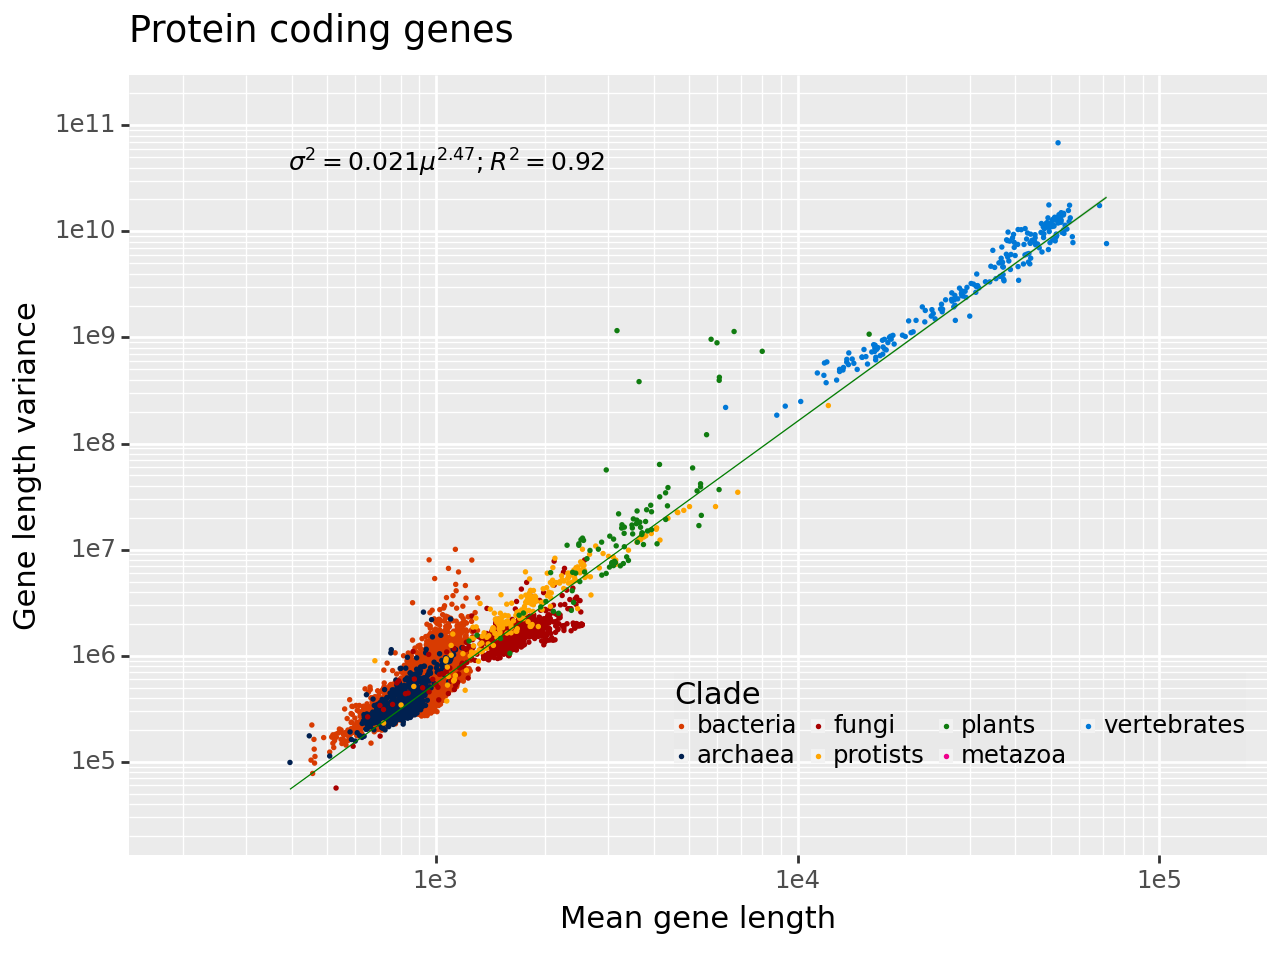

In [6]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = True

df2plot = stat_df
if 0:
    print(df2plot.shape)

# Sort division_8 in order to plot the clades in an order (everything can be displayed)
if 0:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $

# Analyze the Lg distribution clade by clade

,division_7,division_8,mean,var
0,bacteria,archaea,840.40404,422343.848699


(33627, 4)
bacteria Index(['division_7', 'division_8', 'mean', 'var'], dtype='object')


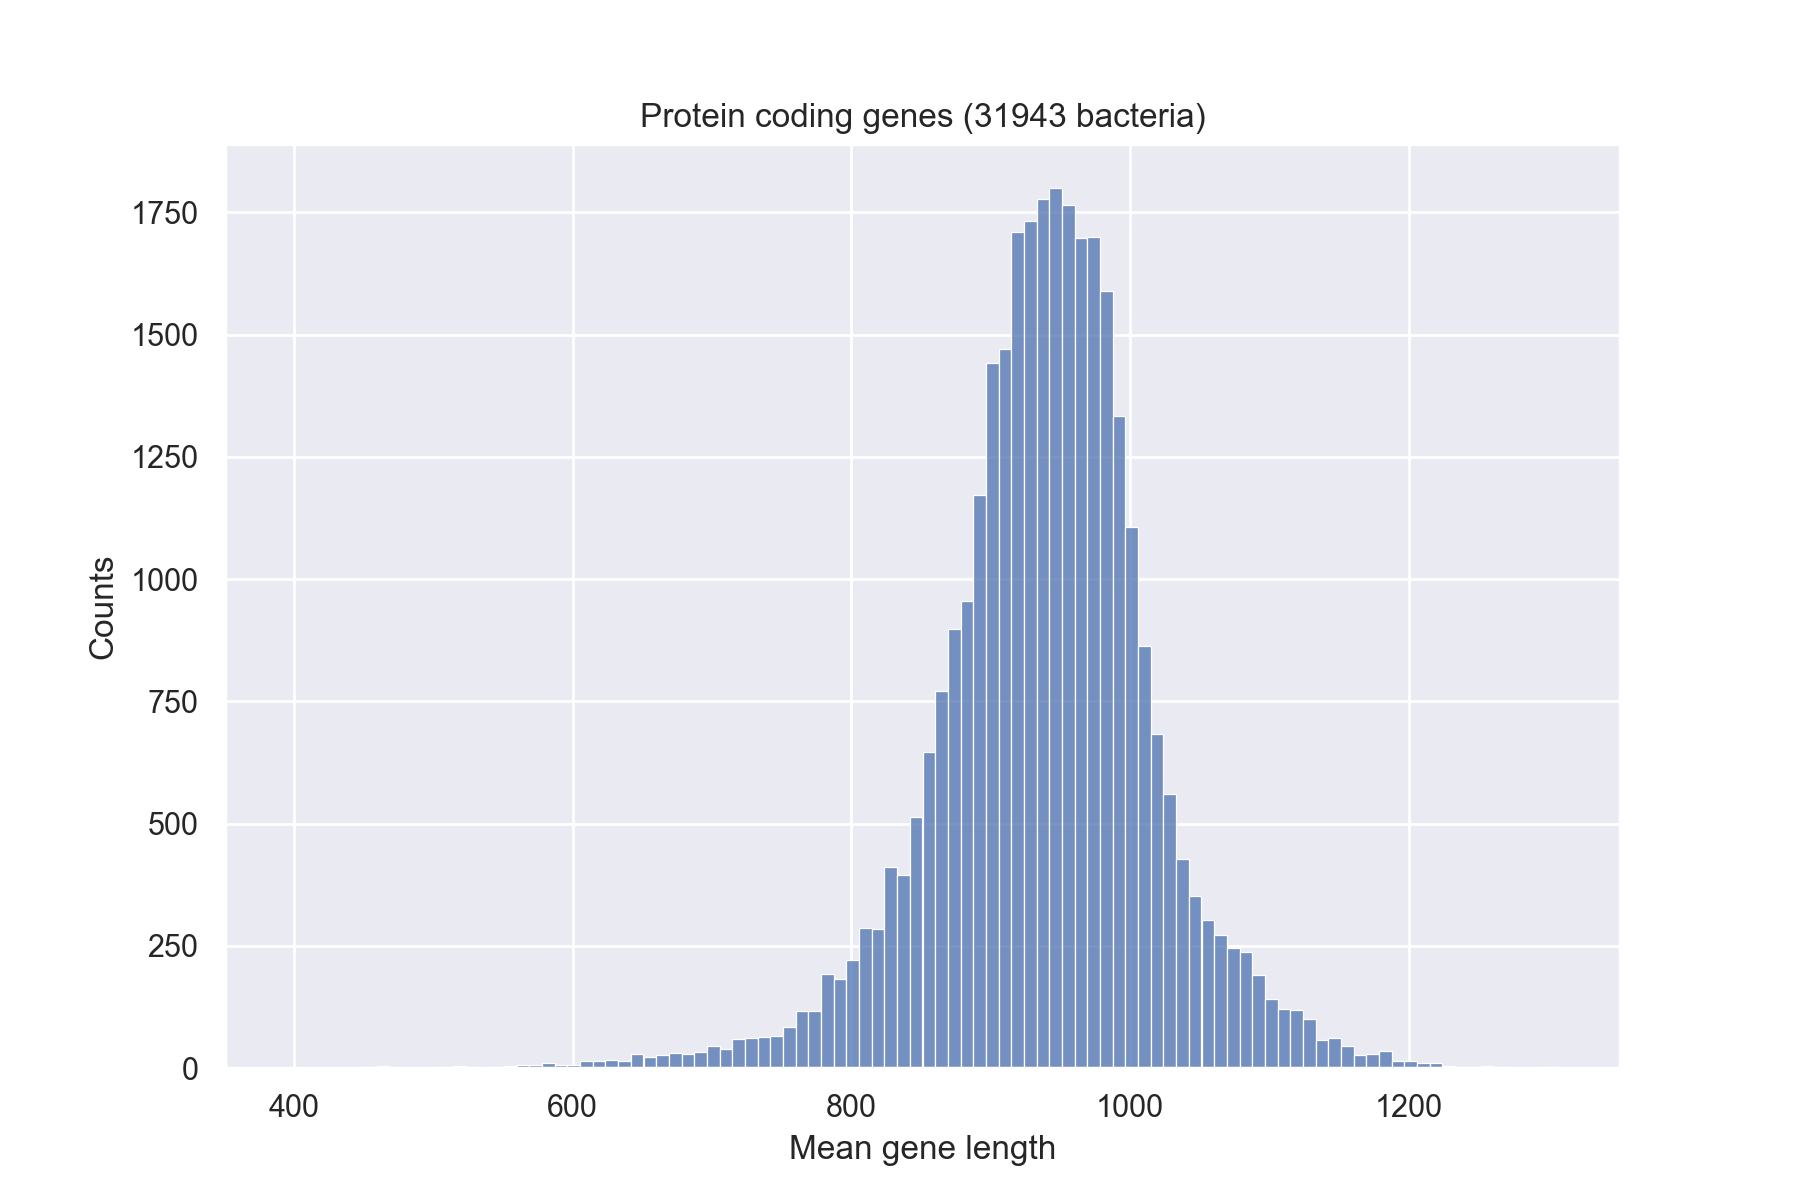

fungi Index(['division_7', 'division_8', 'mean', 'var'], dtype='object')


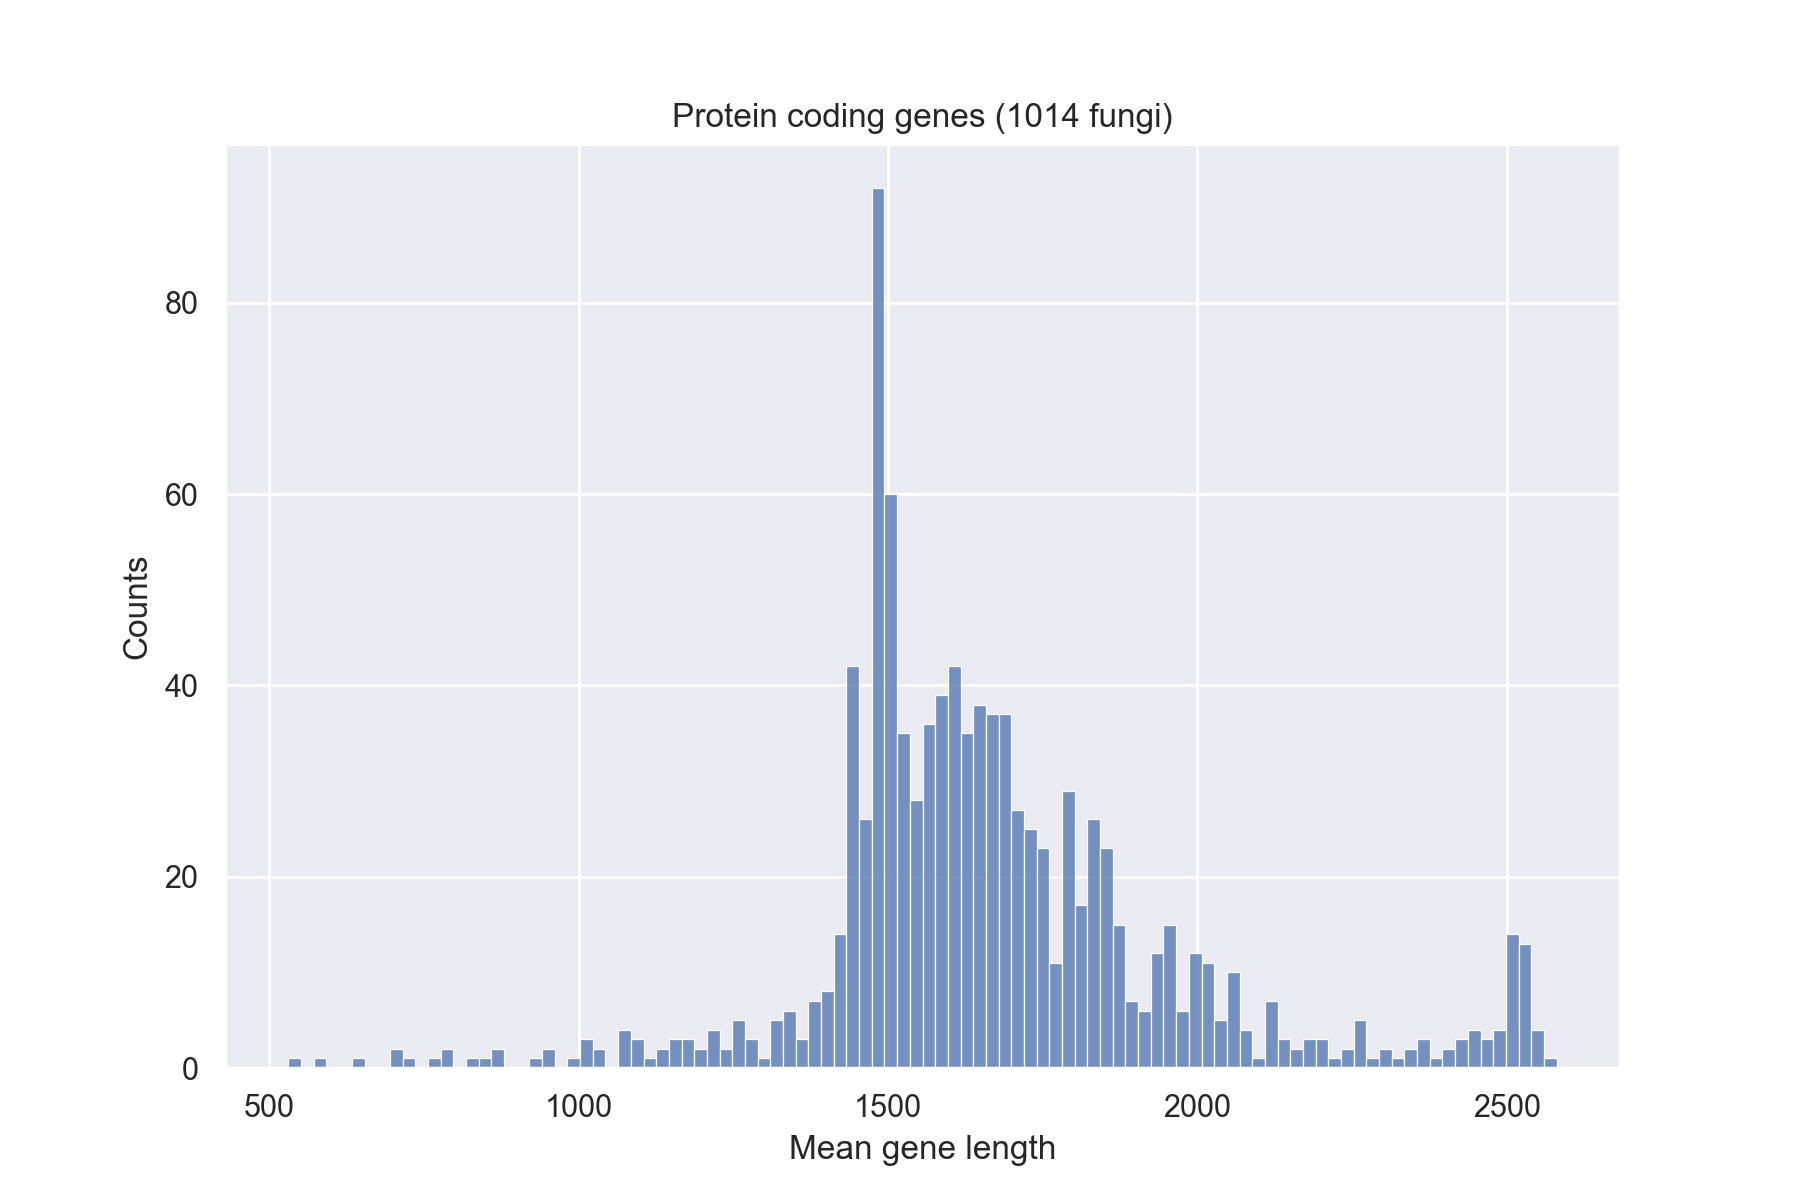

protists Index(['division_7', 'division_8', 'mean', 'var'], dtype='object')


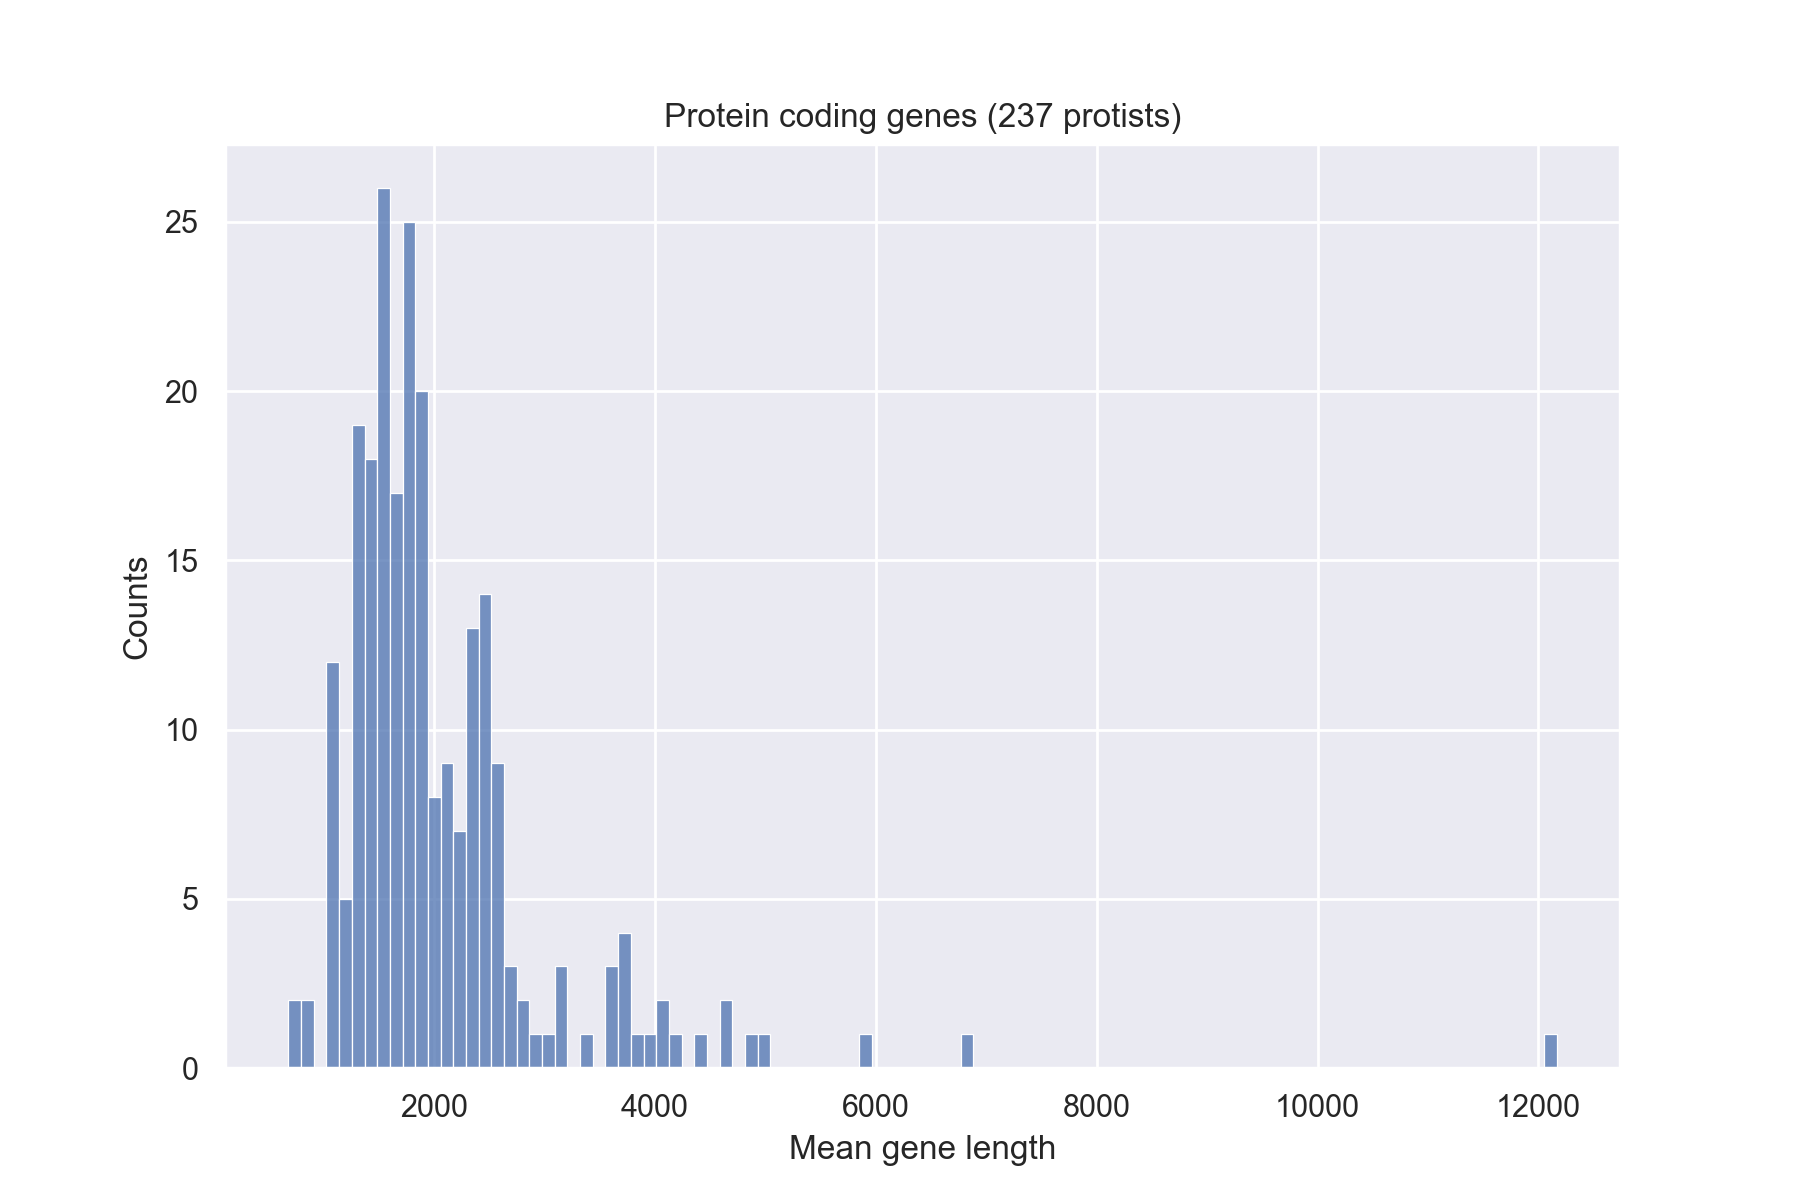

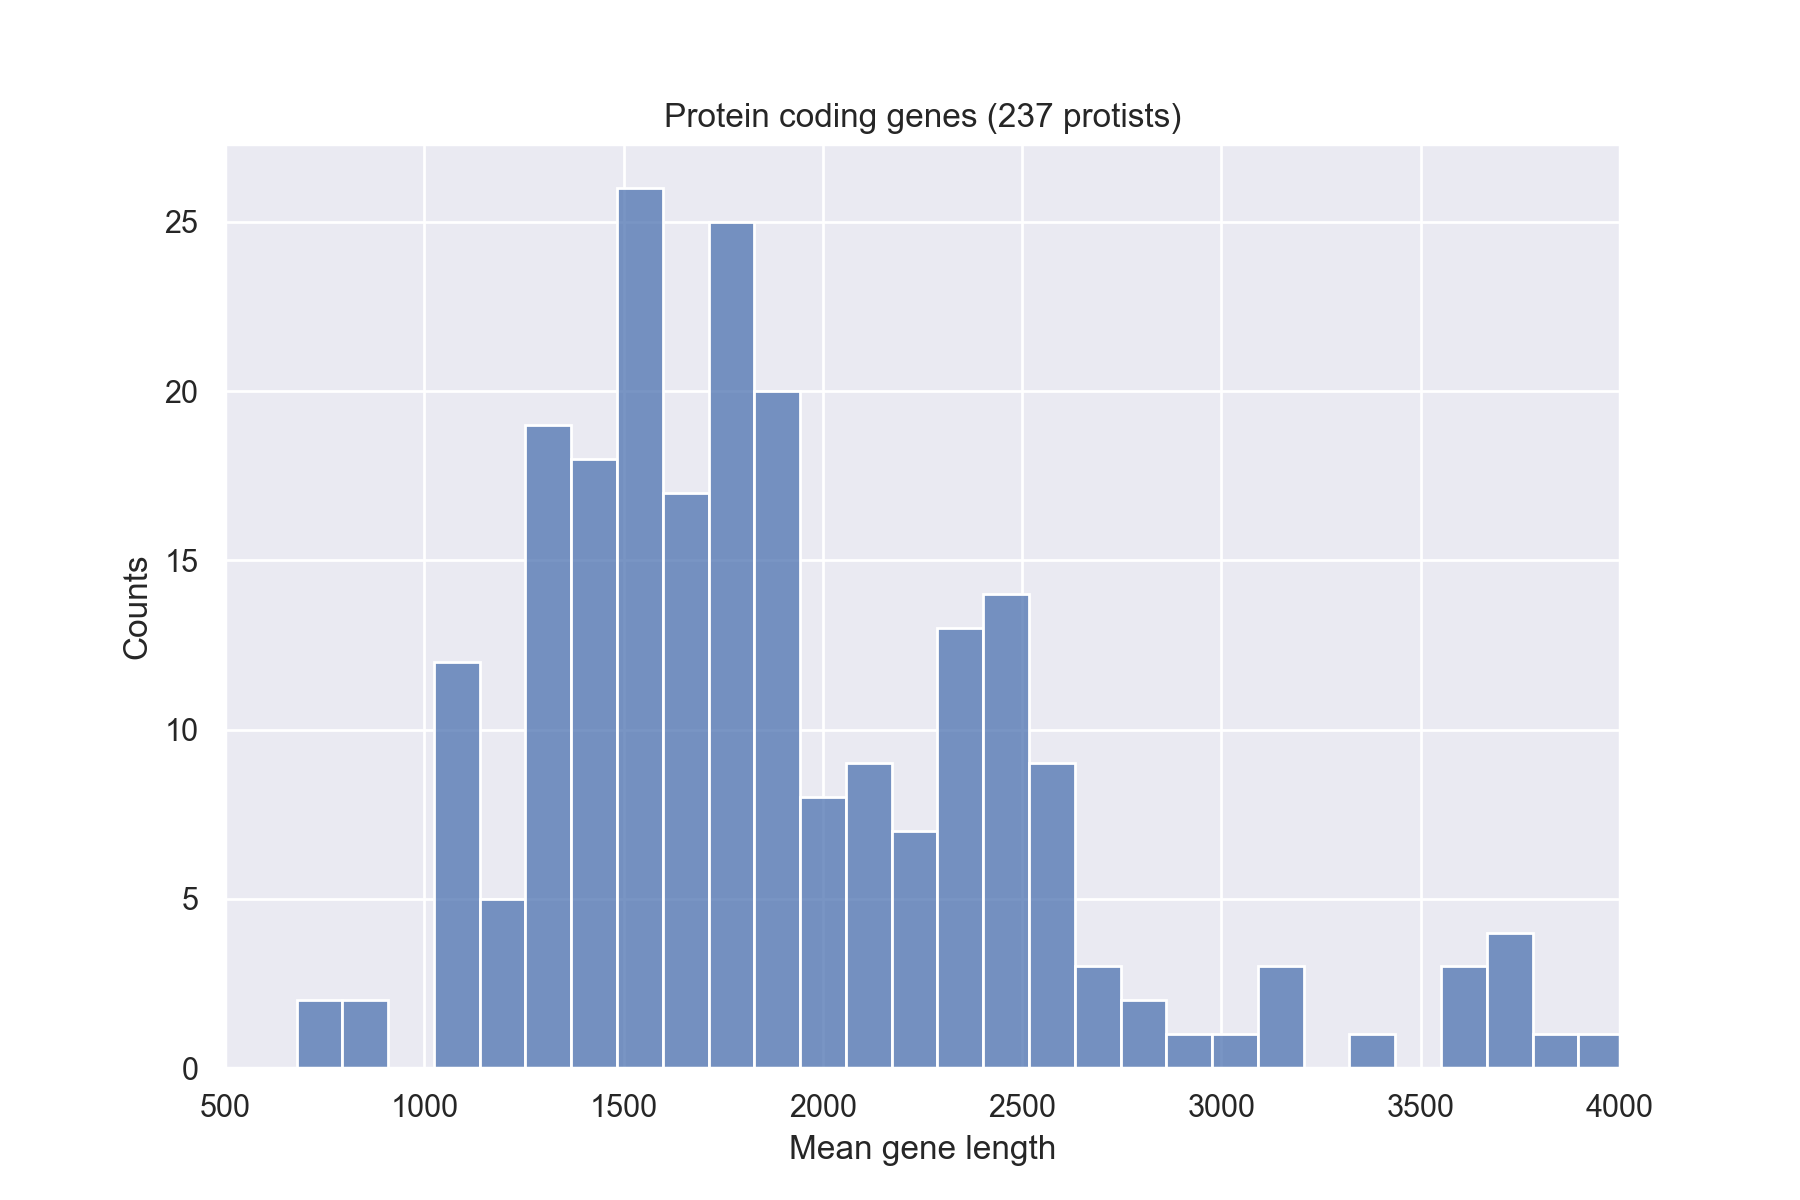

plants Index(['division_7', 'division_8', 'mean', 'var'], dtype='object')


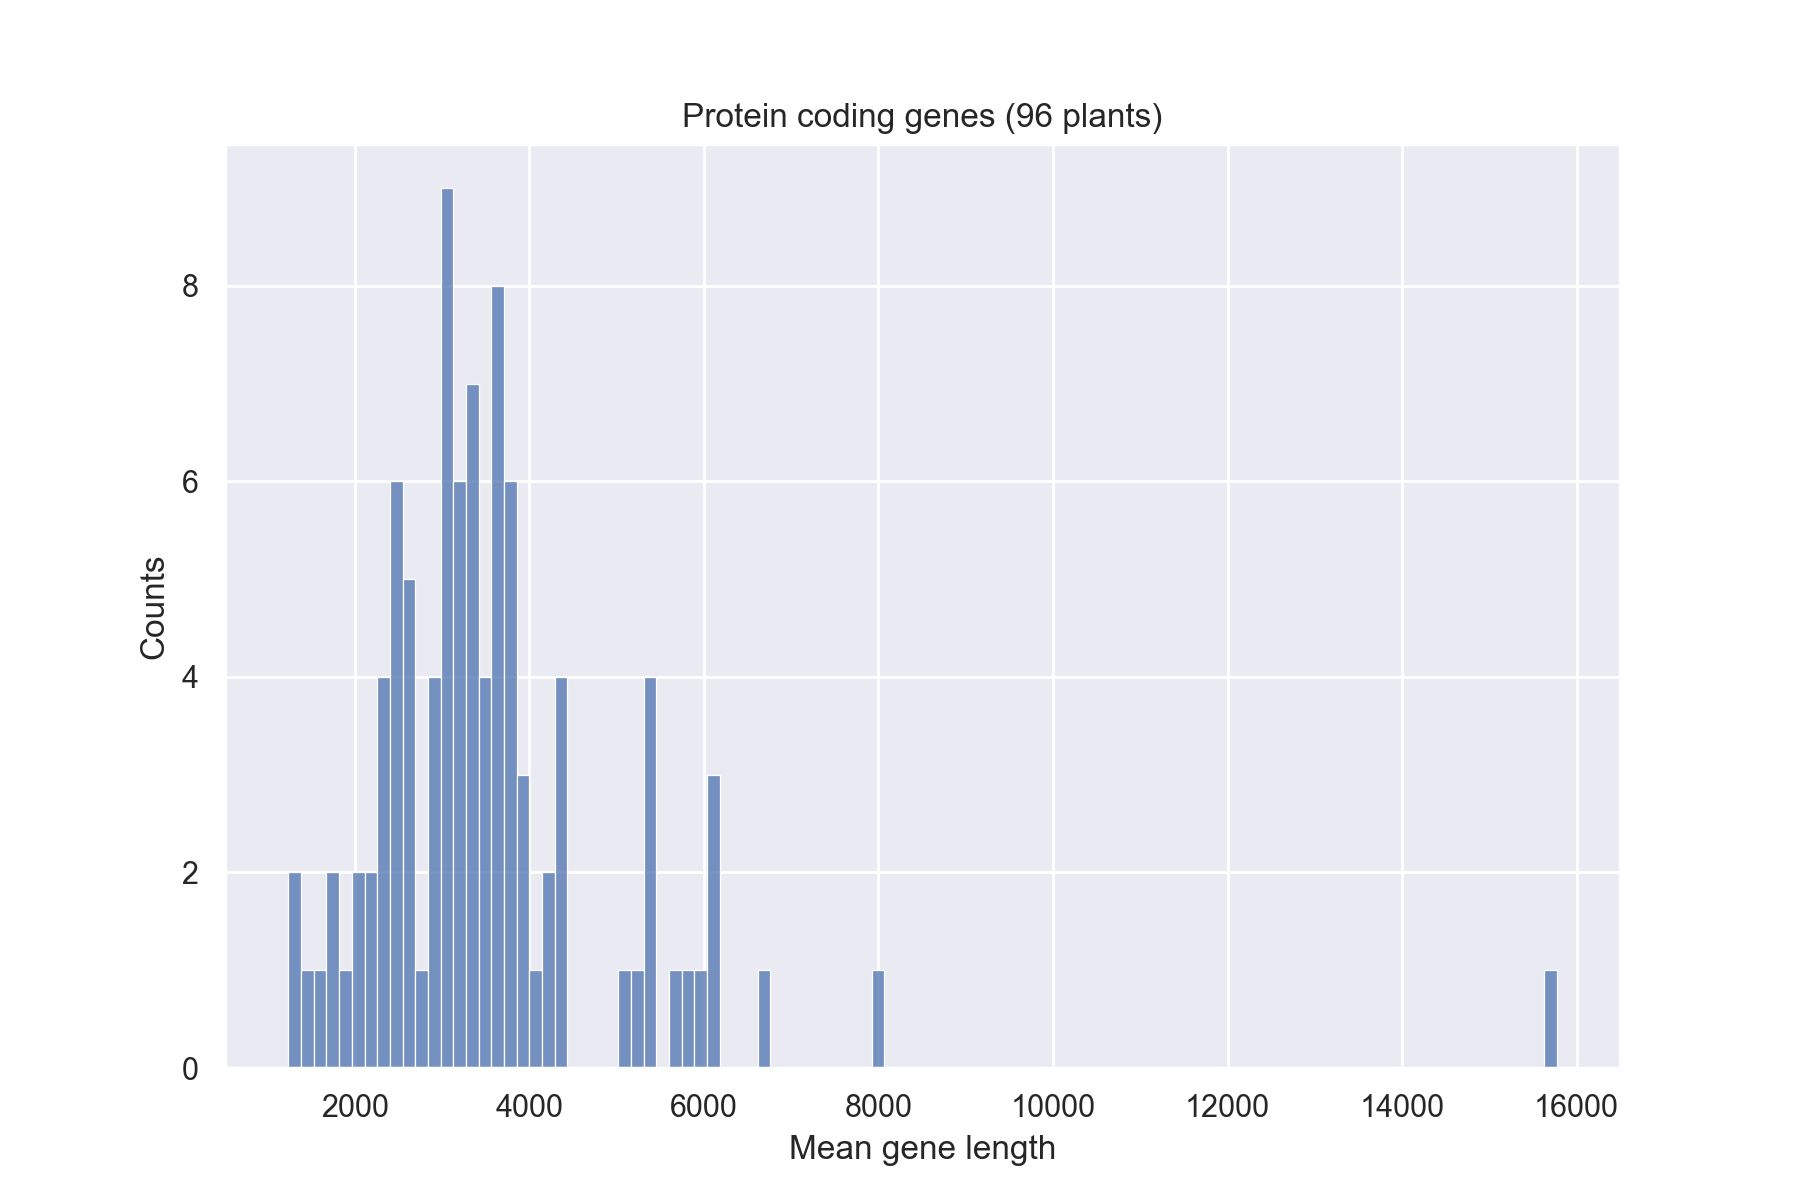

vertebrates Index(['division_7', 'division_8', 'mean', 'var'], dtype='object')


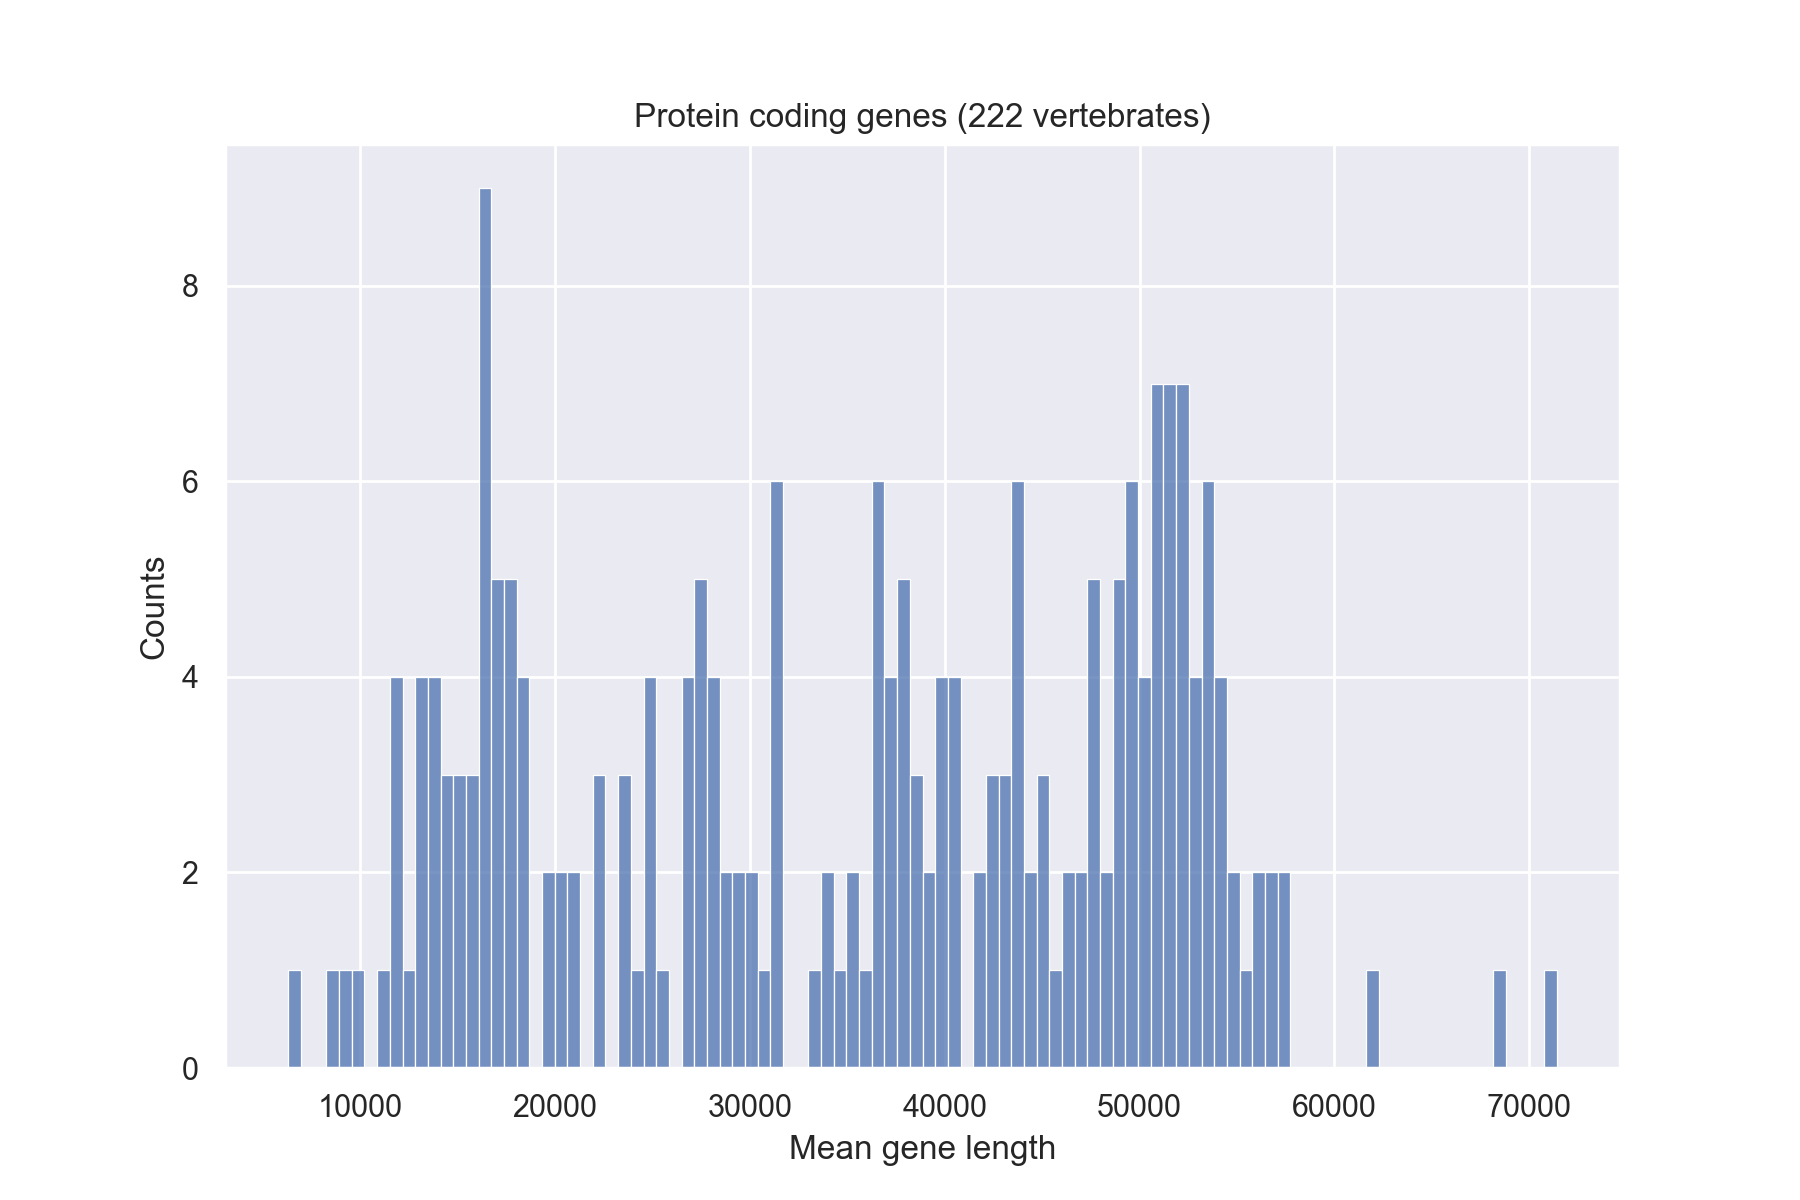

nan Index(['division_7', 'division_8', 'mean', 'var'], dtype='object')


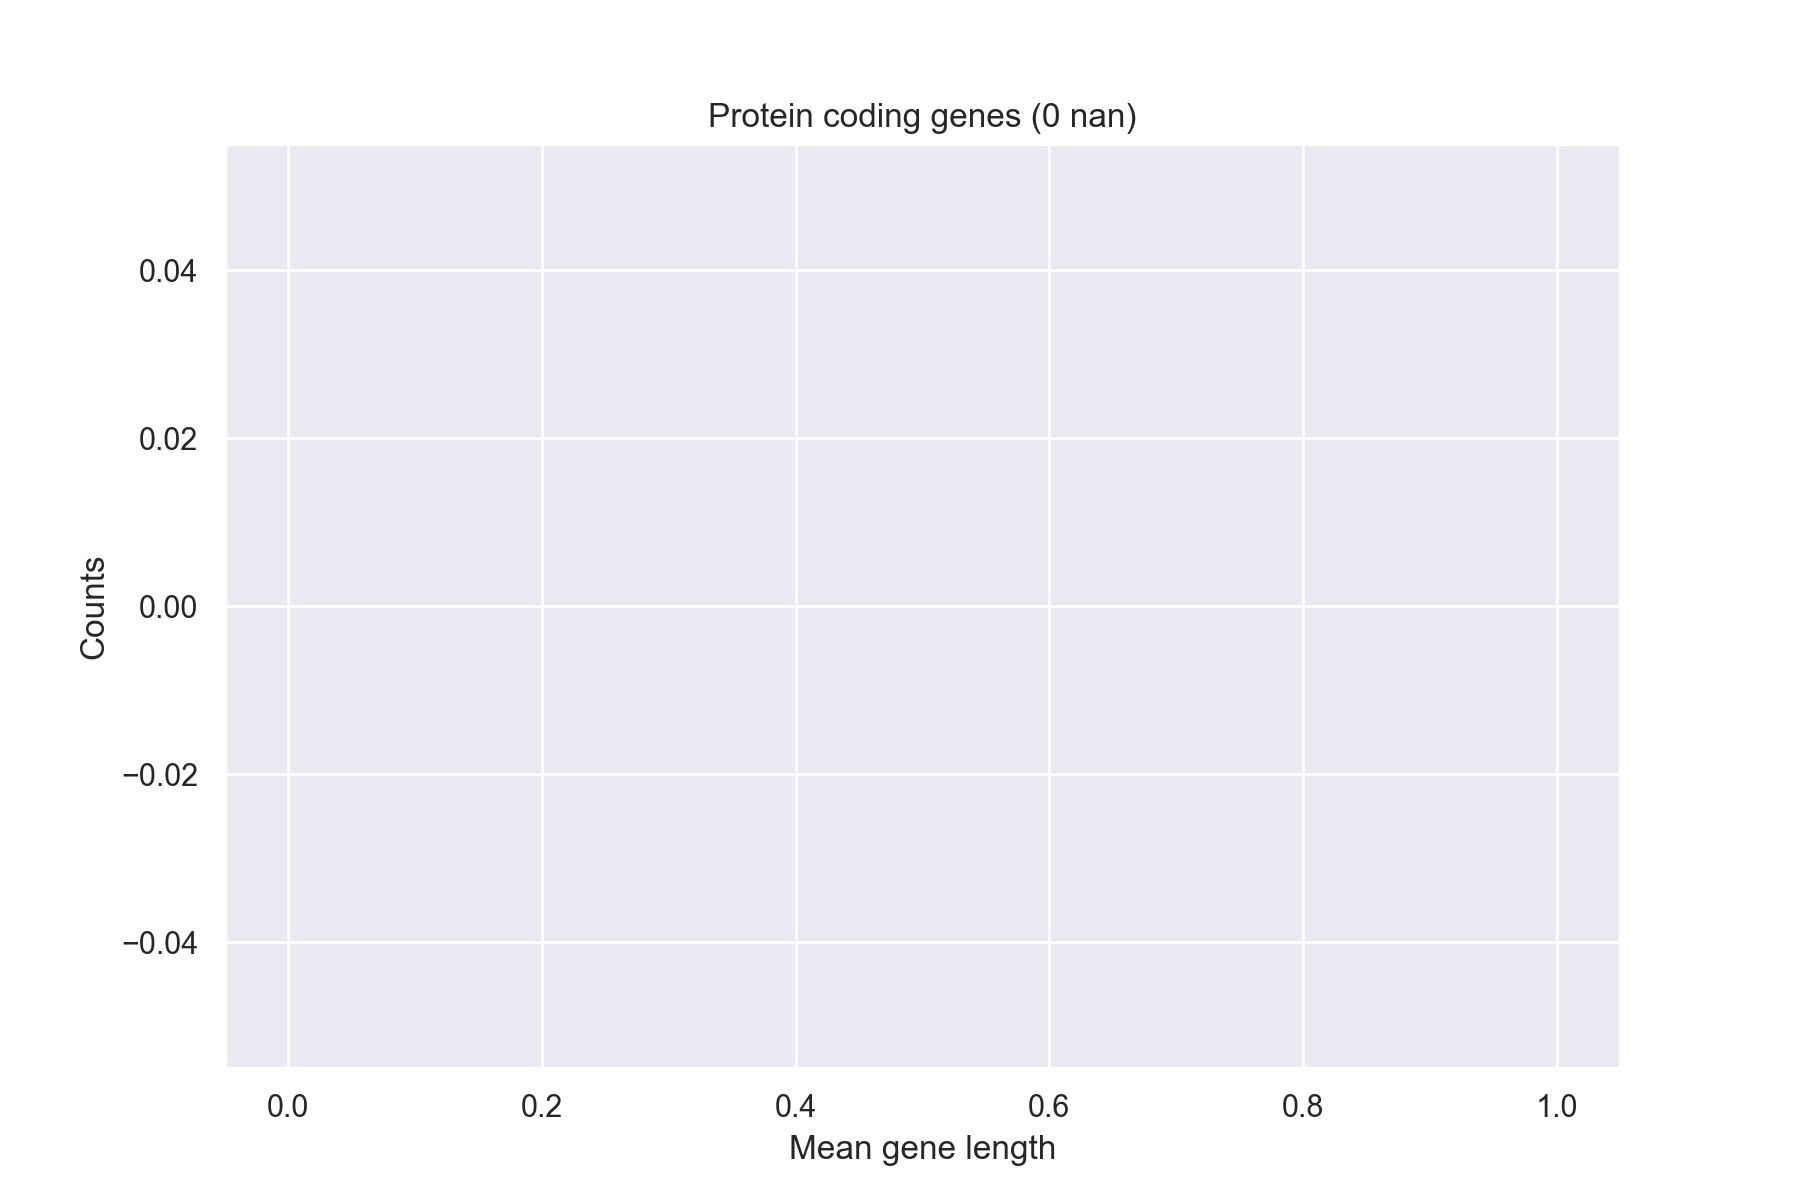

In [7]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_7"
#
title_template = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Counts"
#
#
Lg_df = original_stat_df.copy()
Lg_df = Lg_df[['division_7', 'division_8', 'mean', 'var']] # [['division_7', 'division_8', 'species', 'trunk_genes_path', 'genes_file', 'count', 'mean', 'var']]

# sort by groups of organisms
Lg_df[legends_by] = pd.Categorical(Lg_df[legends_by], 
                                  categories=['archaea','bacteria', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                  ordered=True)
Lg_df.sort_values(legends_by, inplace=True)

display(Lg_df.head(1))
if 1:
    print(Lg_df.shape)

plt.show()
for clade in Lg_df[legends_by].unique().tolist(): # for each division
    print(clade, Lg_df.columns)
    clade_Lg_df = Lg_df[Lg_df[legends_by]==clade]

    if 1: # Set up to 1 for plotting by clade         
        title = title_template + " (" + str(clade_Lg_df.shape[0]) + " " + str(clade) + ")"
        sns.set_theme()
        fig, ax = plt.subplots(figsize=(9, 6))  
        ax.set(title=title, xlabel=x_lab, ylabel=y_lab)
        #
        sns.histplot(data=clade_Lg_df, x="mean", bins=100)
        #sns.displot(data=clade_Lg_df, x="mean", bins=100, stat="density")
        plt.show()

        if clade == "protists": # replot protists
            sns.set_theme()
            fig, ax = plt.subplots(figsize=(9, 6))  
            ax.set(title=title, xlabel=x_lab, ylabel=y_lab)
            #
            ax.set_xlim(500, 4000) 
            sns.histplot(data=clade_Lg_df, x="mean", bins=100)
            plt.show()


# Analyze the Lg density clade by clade

Protein coding genes (31943 bacteria)


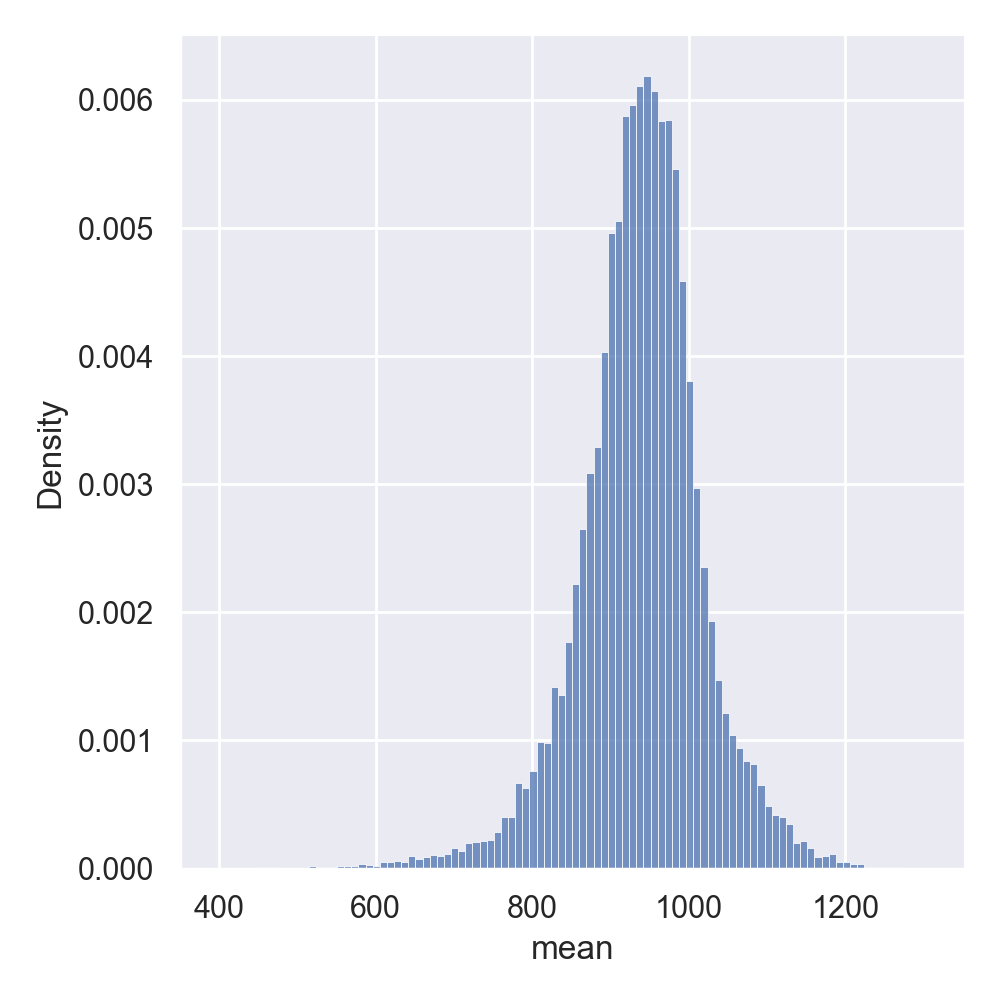

Protein coding genes (1014 fungi)


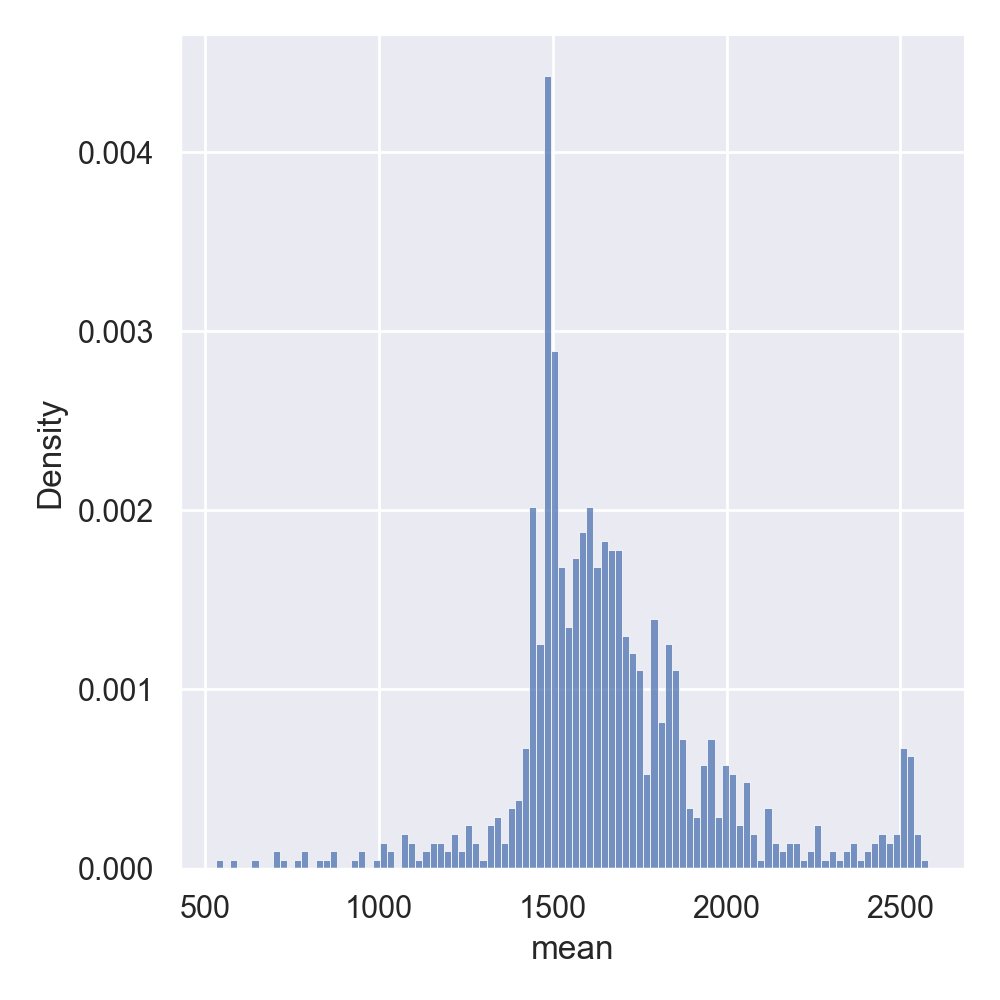

Protein coding genes (237 protists)


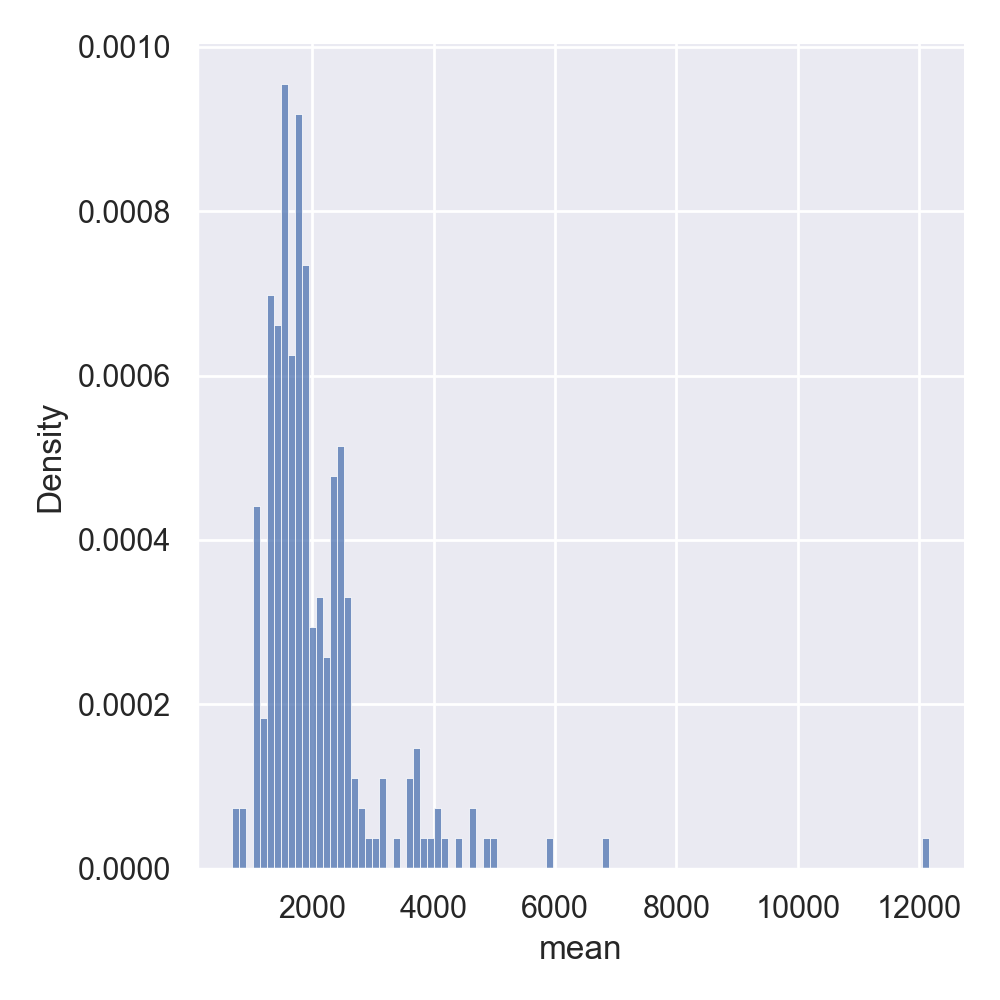

Protein coding genes (96 plants)


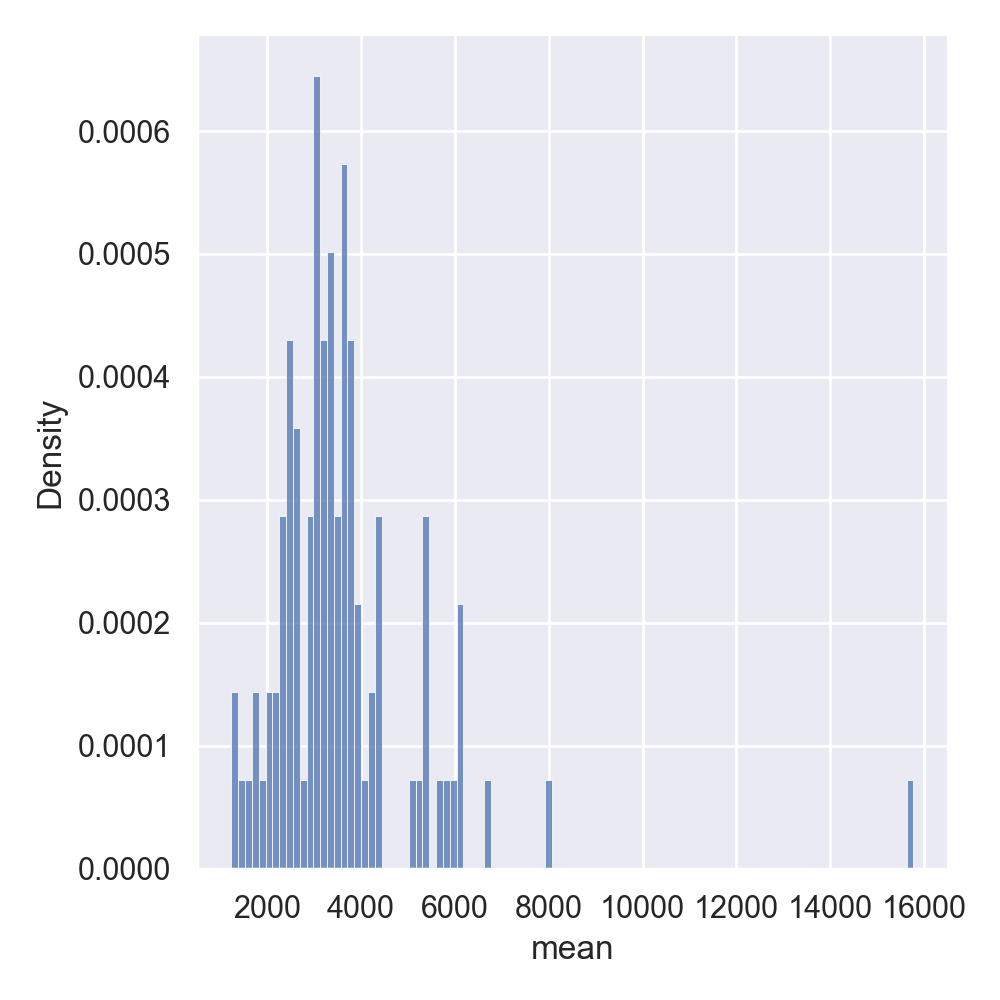

Protein coding genes (222 vertebrates)


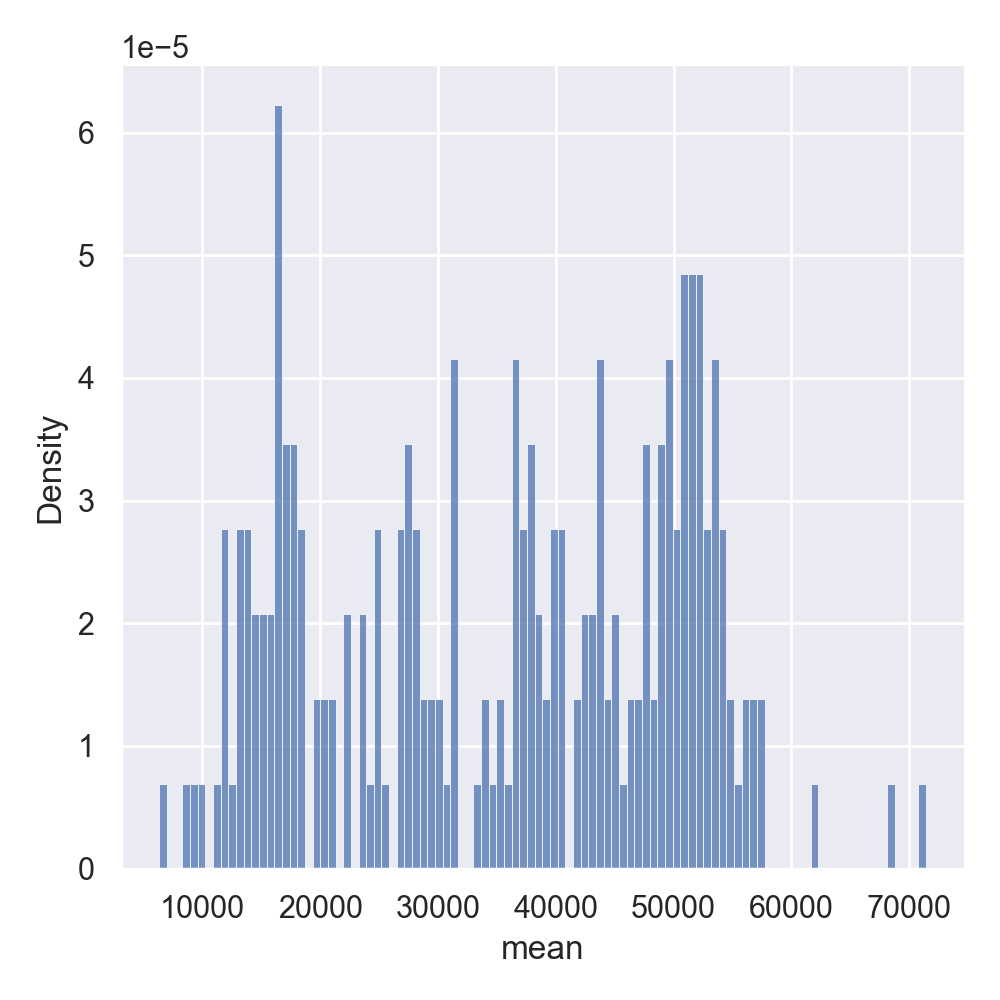

Protein coding genes (0 nan)


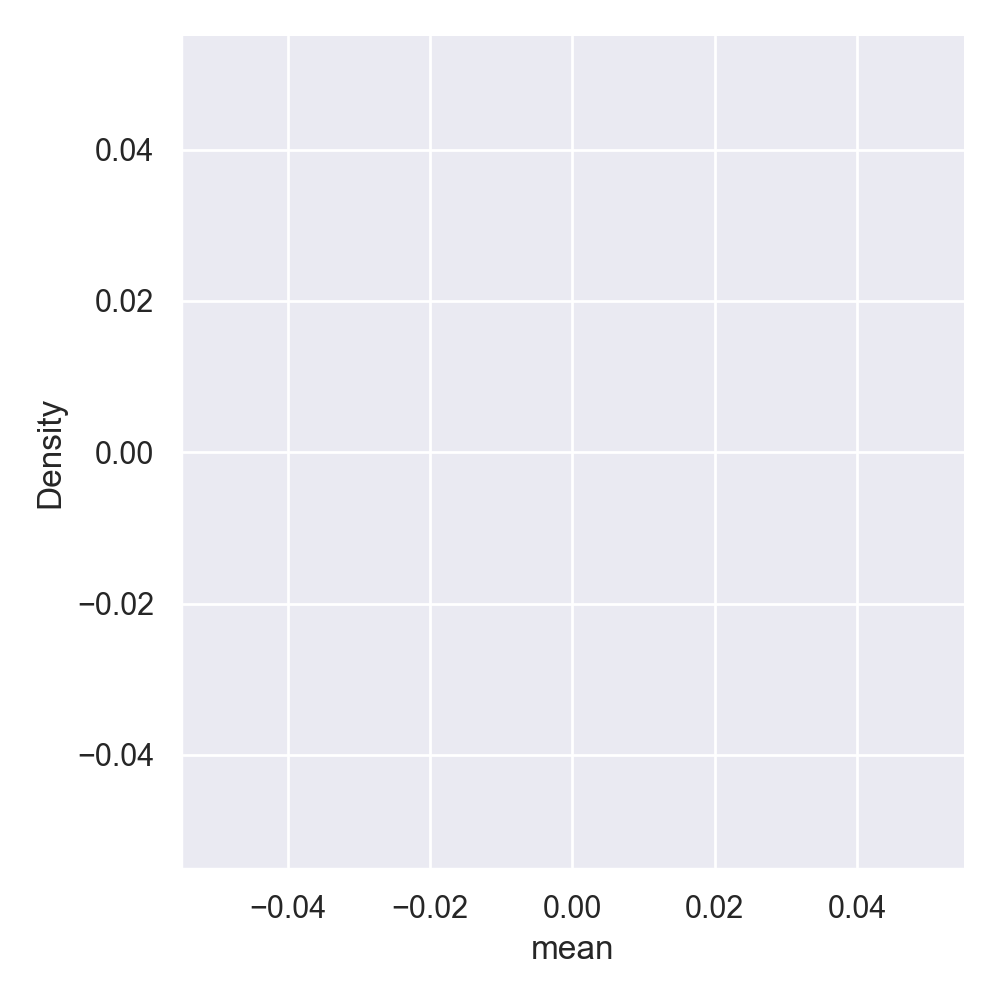

In [8]:
for clade in Lg_df[legends_by].unique().tolist(): # for each division
    clade_Lg_df = Lg_df[Lg_df[legends_by]==clade]
    if 1: # Set up to 1 for plotting by clade         
        title = title_template + " (" + str(clade_Lg_df.shape[0]) + " " + str(clade) + ")"
        sns.set_theme()
        sns.displot(data=clade_Lg_df, x="mean", bins=100, stat="density")
        print(title)
        plt.show()